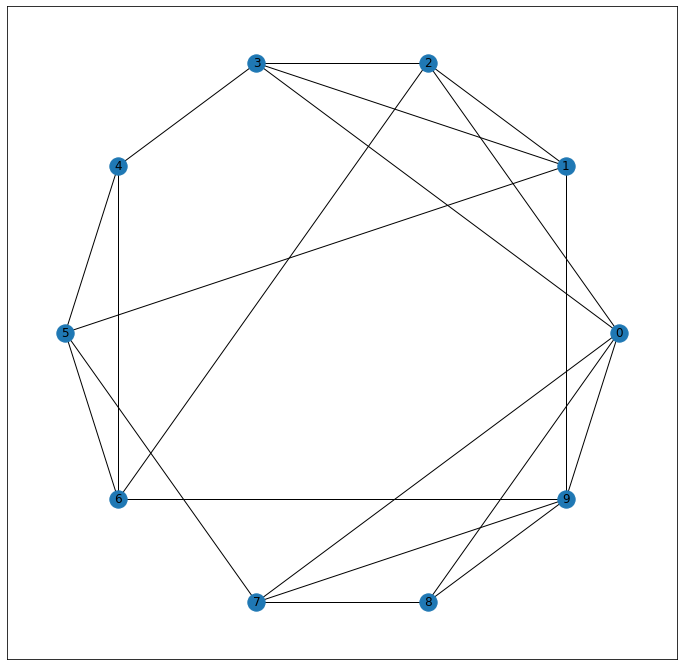

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G = nx.watts_strogatz_graph(n = 10, k = 4, p = 0.5)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

Attempts to generate a connected graph by repeated generation of Watts–Strogatz small-world graphs. An exception is raised if the maximum number of tries is exceeded.

{(0, 1): Text(0.9045085018604486, 0.29389263494502404, 'exci'),
 (0, 9): Text(0.9045084720581265, -0.29389263534186216, 'exci'),
 (0, 2): Text(0.6545084884494037, 0.4755282818745524, 'exci'),
 (0, 8): Text(0.6545085629552092, -0.47552822266674616, 'exci'),
 (0, 5): Text(5.960464510845753e-09, -2.9008645978946276e-08, 'exci'),
 (0, 7): Text(0.34549144300525525, -0.47552822266674616, 'exci'),
 (1, 9): Text(0.8090169739185751, -1.5099580141786362e-08, 'exci'),
 (1, 4): Text(5.960464399823451e-09, 0.5877852551873061, 'exci'),
 (1, 2): Text(0.5590169903098523, 0.7694209021168344, 'exci'),
 (1, 7): Text(0.24999994486570384, -0.18163560242446414, 'exci'),
 (1, 6): Text(3.576278662098531e-08, -1.5099580141786362e-08, 'exci'),
 (2, 4): Text(-0.25000000745058054, 0.7694209021168344, 'exci'),
 (3, 4): Text(-0.5590170081912457, 0.7694208723145122, 'exci'),
 (3, 5): Text(-0.6545085063307969, 0.4755282083608422, 'exci'),
 (3, 6): Text(-0.5590169783889235, 0.18163560202762602, 'exci'),
 (4, 5): Text(

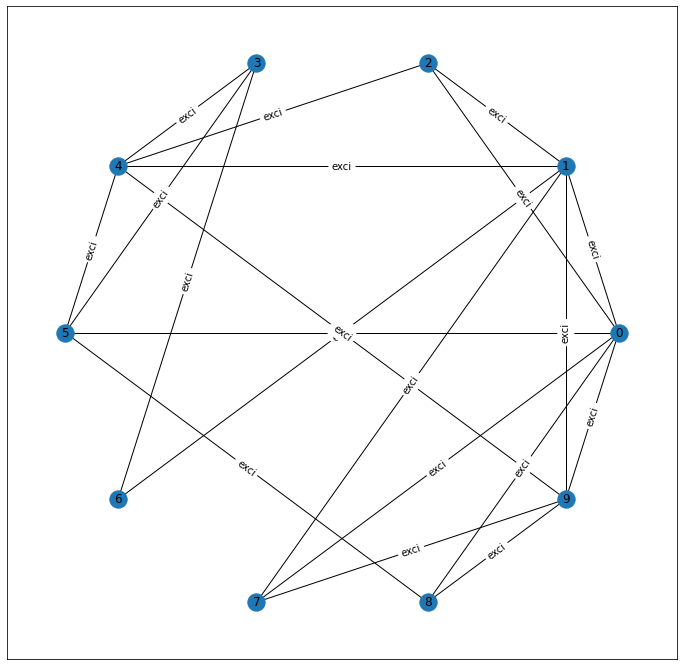

In [21]:
G = nx.connected_watts_strogatz_graph(n=10, k=4, p=0.5, seed=42) 
pos = nx.circular_layout(G)
 
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=connection_types)

In [13]:
list(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
 list(G.edges())

[(0, 1),
 (0, 9),
 (0, 2),
 (0, 8),
 (0, 5),
 (0, 7),
 (1, 9),
 (1, 4),
 (1, 2),
 (1, 7),
 (1, 6),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (4, 9),
 (5, 8),
 (7, 9),
 (8, 9)]

In [16]:
connection_types = {k:'exci' for k in list(G.edges())}

In [17]:
connection_types

{(0, 1): 'exci',
 (0, 9): 'exci',
 (0, 2): 'exci',
 (0, 8): 'exci',
 (0, 5): 'exci',
 (0, 7): 'exci',
 (1, 9): 'exci',
 (1, 4): 'exci',
 (1, 2): 'exci',
 (1, 7): 'exci',
 (1, 6): 'exci',
 (2, 4): 'exci',
 (3, 4): 'exci',
 (3, 5): 'exci',
 (3, 6): 'exci',
 (4, 5): 'exci',
 (4, 9): 'exci',
 (5, 8): 'exci',
 (7, 9): 'exci',
 (8, 9): 'exci'}

In [28]:
print(sorted(list(G.neighbors(0))))

[1, 2, 5, 7, 8, 9]


In [30]:
nx.average_clustering(G)

0.4600000000000001

In [31]:
nx.average_shortest_path_length(G)

1.6

In [65]:
n=100
ks= list(range(6,18,2))
ps = list(np.arange(0.1, 0.6,0.001))
seeds=list(range(100))

In [66]:
best=np.array(10)
L=0
C=0

In [67]:
for k in ks:
    for p in ps:
        for seed in seeds:
            G = nx.connected_watts_strogatz_graph(n=n, k=k, p=p, seed=seed)
            path_length= nx.average_shortest_path_length(G)
            clustering= nx.average_clustering(G)
            if best > np.sum(np.absolute(np.array([(2.65-path_length)/2.65, (0.28-clustering)/0.28]))):
                best= np.sum(np.absolute(np.array([(2.65-path_length)/2.65, (0.28-clustering)/0.28])))
                L = path_length
                C = clustering
                k_best=k
                p_best=p
                seed_best=seed
                best_G=G
            

In [71]:
L,C,k_best,p_best,seed_best

(2.6466666666666665, 0.28012554112554094, 8, 0.2580000000000001, 93)

In [57]:
nx.average_shortest_path_length(best_G)

2.1794354838709675

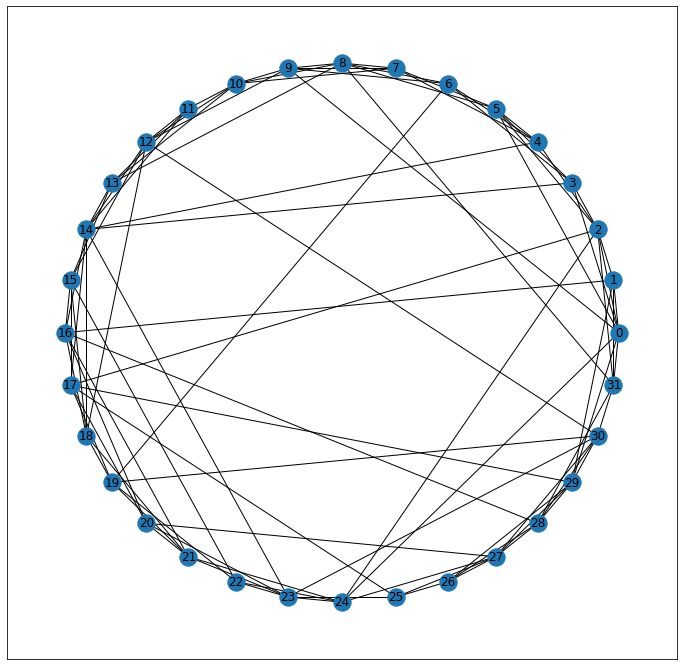

In [56]:
pos = nx.circular_layout(best_G)
 
plt.figure(figsize = (12, 12))
nx.draw_networkx(best_G, pos, with_labels=True)

In [37]:
np.log(32)

3.4657359027997265

In [69]:
best_G_100=best_G

In [70]:
# Step 1
import pickle
 
# Step 2
with open('best_G_100', 'wb') as config_dictionary_file:
 
  # Step 3
  pickle.dump(best_G_100, config_dictionary_file)

In [64]:
# Step 1
import pickle
 
# Step 2
with open('best_G_32', 'rb') as config_dictionary_file:
 
    # Step 3
    config_dictionary = pickle.load(config_dictionary_file)
 
    # After config_dictionary is read from file
    print(config_dictionary)

Graph with 32 nodes and 96 edges
